In [8]:
#importing all the modules required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings(action="ignore")

Let’s solve another demo classification problem. It's a classic dataset that is made up of 1797 8x8 images detailing a hand-written digit.

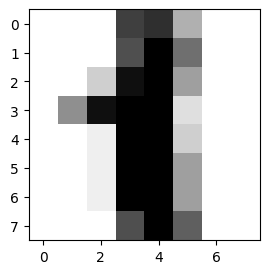

In [18]:
from sklearn import datasets
digits = datasets.load_digits()

# Display the last digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

That’s your data to work with. x is a multi-dimensional array with 1797 rows and 64 columns. It contains integers from 0 to 16. y is an one-dimensional array with 1797 integers between 0 and 9.



In [9]:
x, y = load_digits(return_X_y=True)

In [17]:
x[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [11]:
y

array([0, 1, 2, ..., 8, 9, 8])

It’s a good and widely-adopted practice to split the dataset you’re working with into two subsets. These are the training set and the test set. This split is usually performed randomly. You should use the training set to fit your model. Once the model is fitted, you evaluate its performance with the test set. It’s important not to use the test set in the process of fitting the model. This approach enables an unbiased evaluation of the model.

### Test and Train Splits
One way to split your dataset into training and test sets is to apply **train_test_split()**:

In [19]:
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=42)

train_test_split() accepts x and y. It also takes test_size, which determines the size of the test set, and random_state to define the state of the pseudo-random number generator, as well as other optional arguments. This function returns a list with four arrays:

**x_train**: the part of x used to fit the model
**x_test**: the part of x used to evaluate the model
**y_train**: the part of y that corresponds to x_train
**y_test**: the part of y that corresponds to x_test

Once your data is split, you can forget about x_test and y_test until you define your model.

### Scaling Data

Standardization is the process of transforming data in a way such that the mean of each column becomes equal to zero, and the standard deviation of each column is one. This way, you obtain the same scale for all columns. Take the following steps to standardize your data:

Calculate the mean and standard deviation for each column.
Subtract the corresponding mean from each element.
Divide the obtained difference by the corresponding standard deviation.
It’s a good practice to standardize the input data that you use for logistic regression, although in many cases it’s not necessary. Standardization might improve the performance of your algorithm. It helps if you need to compare and interpret the weights. It’s important when you apply penalization because the algorithm is actually penalizing against the large values of the weights.

You can standardize your inputs by creating an instance of StandardScaler and calling .fit_transform() on it:

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

$$z = (x - u) / s$$

where $u$ is the mean of the training samples or zero if with_mean=False, and $s$ is the standard deviation of the training samples or one if with_std=False.

.fit_transform() fits the instance of StandardScaler to the array passed as the argument, transforms this array, and returns the new, standardized array. Now, x_train is a standardized input array.

In [22]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

When you’re working with problems with more than two classes, you should specify the multi_class parameter of LogisticRegression. It determines how to solve the problem:

- **'ovr'** says to make the binary fit for each class.

- **'multinomial'** says to apply the multinomial loss fit.


### Evaluate the model
You should evaluate your model similar to what you did in the previous examples, with the difference that you’ll mostly use x_test and y_test, which are the subsets not applied for training. If you’ve decided to standardize x_train, then the obtained model relies on the scaled data, so x_test should be scaled as well with the same instance of StandardScaler:

In [23]:
x_test = scaler.transform(x_test)

You can obtain the predicted outputs with .predict():

In [24]:
y_pred = model.predict(x_test)

In [25]:
 model.score(x_train, y_train)

0.9659011830201809

In [26]:
model.score(x_test, y_test)

0.9611111111111111

Actually, you can get two values of the accuracy, one obtained with the training set and other with the test set. It might be a good idea to compare the two, as a situation where the training set accuracy is much higher might indicate overfitting. The test set accuracy is more relevant for evaluating the performance on unseen data since it’s not biased.

In [31]:
cf_matrix = confusion_matrix(y_test, y_pred)

<Axes: >

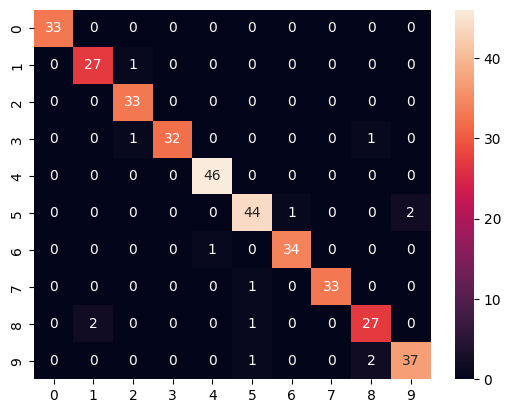

In [33]:
sns.heatmap(cf_matrix, annot=True)

This is a heatmap that illustrates the confusion matrix with numbers and colors. You can see that the shades of purple represent small numbers (like 0, 1, or 2), while green and yellow show much larger numbers (27 and above).

The numbers on the main diagonal (27, 32, …, 36) show the number of correct predictions from the test set. For example, there are 27 images with zero, 32 images of one, and so on that are correctly classified. Other numbers correspond to the incorrect predictions. For example, the number 1 in the third row and the first column shows that there is one image with the number 2 incorrectly classified as 0.